In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.3)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
# import data
data = pd.read_csv('/Users/binh230901/Desktop/DA/project/prime/customer_segmentation/data/Mall_Customers.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# rename column
data.rename(columns={'Genre': 'Gender'}, inplace= True)

In [4]:
# checnk null value
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [5]:
# drop col CustomerID
data.drop('CustomerID', axis= 1, inplace= True)

In [6]:
data.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

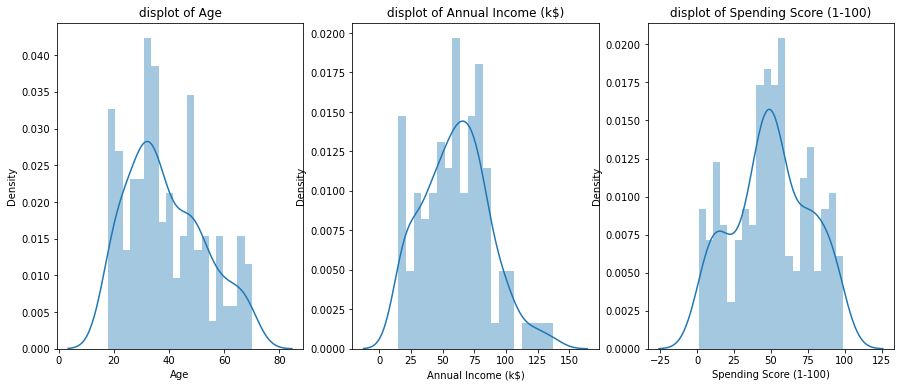

In [7]:
# distribution
n = 0
fig, ax = plt.subplots(1, 3, figsize= (15, 6))
for i in data.iloc[:, 1:].columns : 
    sns.distplot(data[i], bins= 20, ax= ax[n])
    ax[n].title.set_text(f'displot of {i}')
    n+= 1

<AxesSubplot:xlabel='count', ylabel='Gender'>

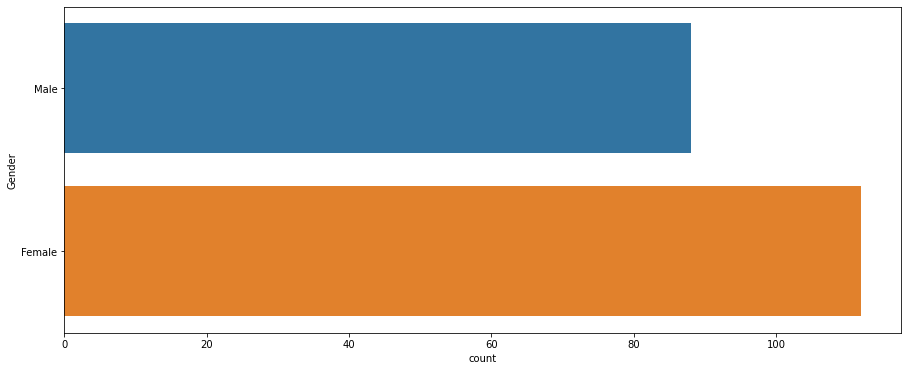

In [8]:
# phan theo gioi tinh
plt.figure(figsize=(15, 6))
sns.countplot(y= data['Gender'])

# Univariate Analysis
## c1: displot chart

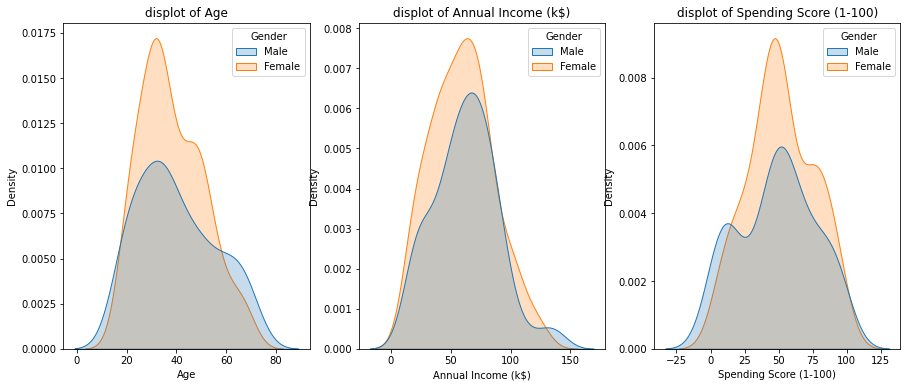

In [9]:
# chia theo gioi tinh
n = 0
fig, ax = plt.subplots(1, 3, figsize= (15, 6))
for i in data.iloc[:, 1:].columns : 
    sns.kdeplot(data[i],shade= True , ax= ax[n], hue= data['Gender'])
    ax[n].title.set_text(f'displot of {i}')
    n+= 1

## C2: bar chart

Text(0, 0.5, 'Number of customers')

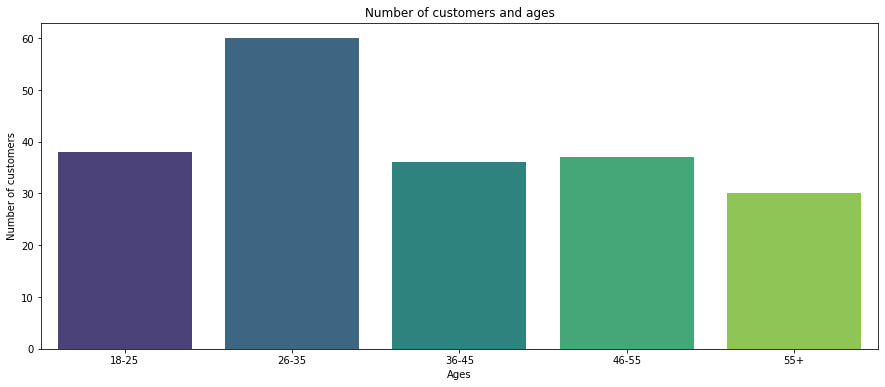

In [10]:
# chia theo do tuoi
age_18_25 = data['Age'][(data['Age'] >= 18) & (data['Age'] <= 25)]
age_26_35 = data['Age'][(data['Age'] >= 26) & (data['Age'] <= 35)]
age_36_45 = data['Age'][(data['Age'] >= 36) & (data['Age'] <= 45)]
age_46_55 = data['Age'][(data['Age'] >= 46) & (data['Age'] <= 55)]
age_56_above = data['Age'][data['Age'] >= 55]
# plot bar
plt.figure(figsize= (15,6))
sns.barplot(x=['18-25', '26-35', '36-45', '46-55', '55+'],
            y= [age_18_25.count(), age_26_35.count(), age_36_45.count(), age_46_55.count(), age_56_above.count()],
            palette= 'viridis'
       )
plt.title('Number of customers and ages')
plt.xlabel('Ages')
plt.ylabel('Number of customers')

In [11]:
'''
khách hàng nằm trong khoảng từ 26-35 tuổi chiếm nhiều nhất đây là đối tượng khách hàng đã trưởng thành 
'''

'\nkhách hàng nằm trong khoảng từ 26-35 tuổi chiếm nhiều nhất đây là đối tượng khách hàng đã trưởng thành \n'

Text(0, 0.5, 'Number of customers')

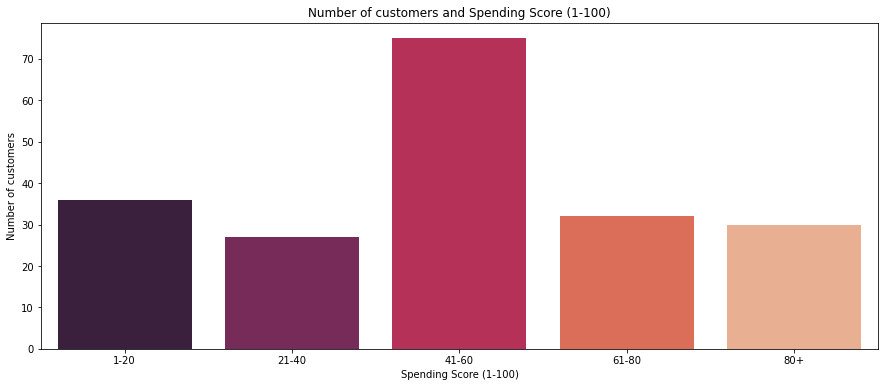

In [12]:
# phan theo spending score
ss_1_20 = data['Spending Score (1-100)'][(data['Spending Score (1-100)'] >0) & (data['Spending Score (1-100)'] <=20)]
ss_21_40 = data['Spending Score (1-100)'][(data['Spending Score (1-100)'] >=21) & (data['Spending Score (1-100)'] <=40)]
ss_41_60 = data['Spending Score (1-100)'][(data['Spending Score (1-100)'] >=41) & (data['Spending Score (1-100)'] <=60)]
ss_61_80 = data['Spending Score (1-100)'][(data['Spending Score (1-100)'] >=61) & (data['Spending Score (1-100)'] <=80)]
ss_81_above = data['Spending Score (1-100)'][data['Spending Score (1-100)'] >=81]

# plot
plt.figure(figsize= (15,6))
sns.barplot(x=['1-20', '21-40', '41-60', '61-80', '80+'],
            y= [ss_1_20.count(), ss_21_40.count(), ss_41_60.count(), ss_61_80.count(), ss_81_above.count()],
            palette= 'rocket'
       )
plt.title('Number of customers and Spending Score (1-100)')
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Number of customers')


Text(0, 0.5, 'Number of customers')

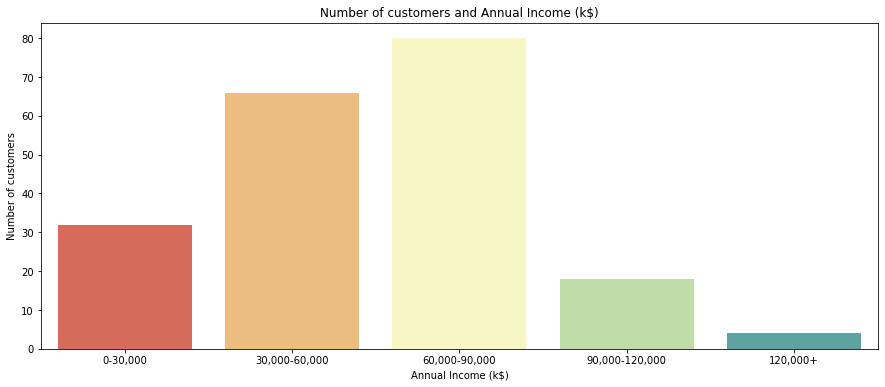

In [13]:
# chia theo Anual Income
ai_0_30= data['Annual Income (k$)'][(data['Annual Income (k$)']>=0) & (data['Annual Income (k$)']<=30)]
ai_30_60= data['Annual Income (k$)'][(data['Annual Income (k$)']>30) & (data['Annual Income (k$)']<=60)]
ai_60_90= data['Annual Income (k$)'][(data['Annual Income (k$)']>60) & (data['Annual Income (k$)']<=90)]
ai_90_120= data['Annual Income (k$)'][(data['Annual Income (k$)']>90) & (data['Annual Income (k$)']<=120)]
ai_120_above= data['Annual Income (k$)'][(data['Annual Income (k$)']>120)]

# plot 
plt.figure(figsize= (15,6))
sns.barplot(x=['0-30,000', '30,000-60,000', '60,000-90,000', '90,000-120,000', '120,000+'],
            y= [ai_0_30.count(), ai_30_60.count(), ai_60_90.count(), ai_90_120.count(), ai_120_above.count()],
            palette= 'Spectral'
       )
plt.title('Number of customers and Annual Income (k$)')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Number of customers')

## scatter

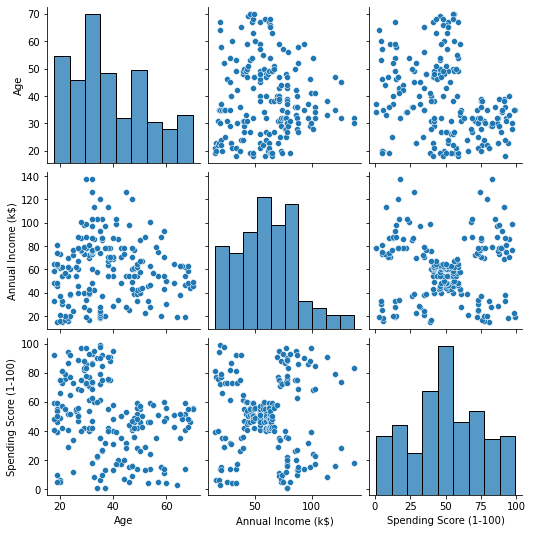

In [14]:
sns.pairplot(data)

## use Kmean to cluster

## Age vs Spending Score (1-100)

Text(0.5, 1.0, 'elbow')

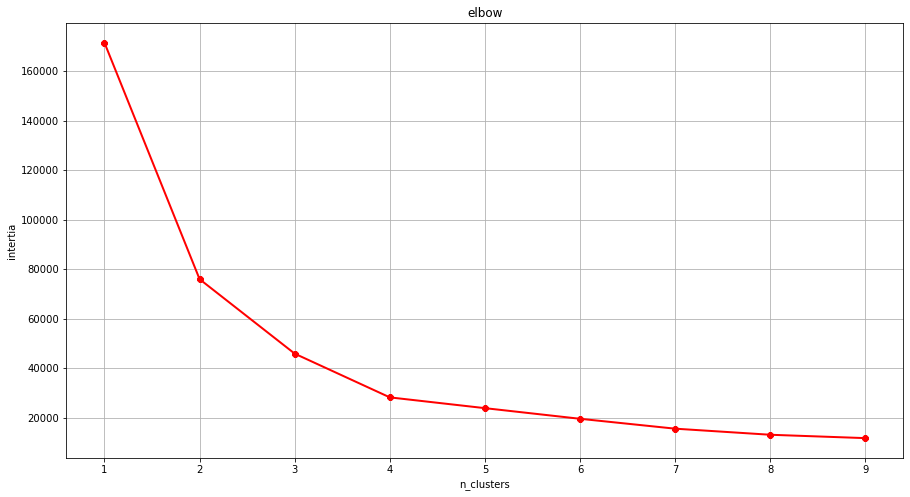

In [15]:
# ap dung elbow de tim n_cluster(4)
from sklearn.cluster import KMeans
x = data[['Age', 'Spending Score (1-100)']].values
intertia = []
for i in range(1, 10):
    kmeans= KMeans(n_clusters= i, random_state= 2)
    kmeans.fit(x)
    intertia.append(kmeans.inertia_)
plt.figure(figsize=(15, 8))
plt.grid()
plt.plot(range(1, 10), intertia, 
         marker= '8',
         linewidth = 2,
         color= 'red'
        )
plt.xlabel('n_clusters')
plt.ylabel('intertia')
plt.title('elbow')

In [16]:
# fit model
model = KMeans(n_clusters= 4, random_state= 2)
model.fit_predict(x)
x_center = model.cluster_centers_

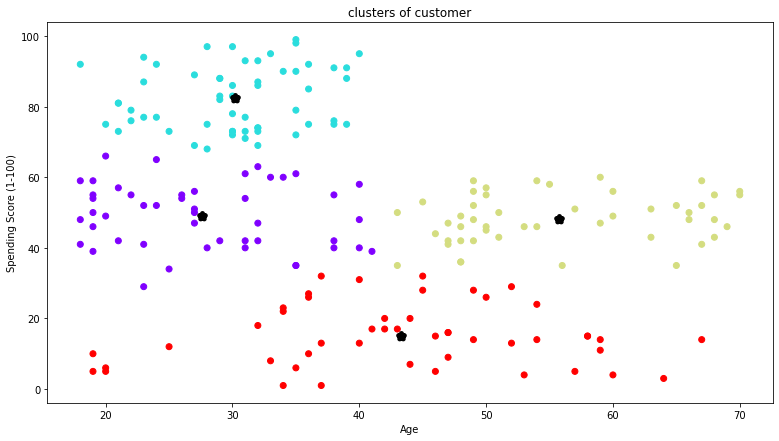

In [17]:
# plot
plt.figure(figsize= (13, 7))
plt.scatter(x[:,0], x[:,1], c= model.labels_, cmap= 'rainbow')
plt.scatter(x_center[:,0], x_center[:,1], color= 'black', marker= '*', linewidths=5)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.title('clusters of customer');

## Annual Income (k) vs Spending Score (1-100)

Text(0.5, 1.0, 'elbow')

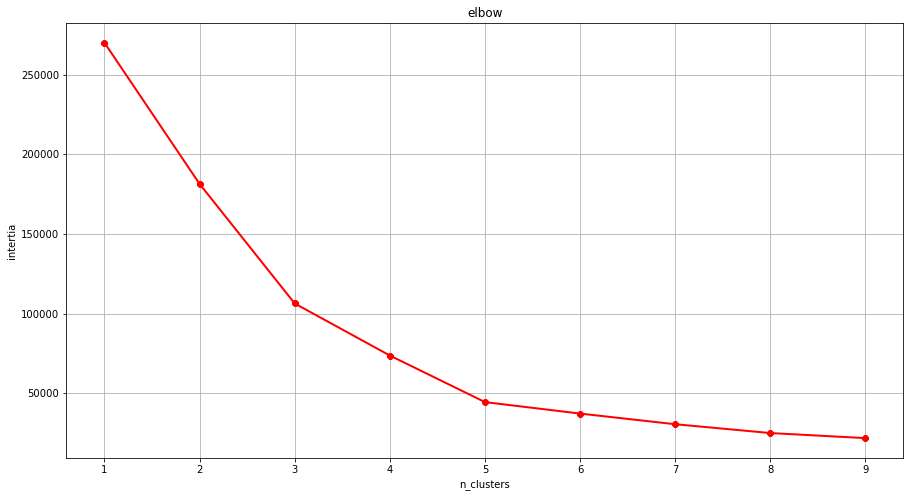

In [18]:
# ap dung elbow de tim n_cluster(5)
from sklearn.cluster import KMeans
x2 = data[['Annual Income (k$)', 'Spending Score (1-100)']].values
intertia = []
for i in range(1, 10):
    kmeans= KMeans(n_clusters= i, random_state= 2)
    kmeans.fit(x2)
    intertia.append(kmeans.inertia_)
plt.figure(figsize=(15, 8))
plt.grid()
plt.plot(range(1, 10), intertia, 
         marker= '8',
         linewidth = 2,
         color= 'red'
        )
plt.xlabel('n_clusters')
plt.ylabel('intertia')
plt.title('elbow')

In [19]:
# fit model
model = KMeans(n_clusters= 5, random_state= 2)
model.fit_predict(x2)
x2_center = model.cluster_centers_

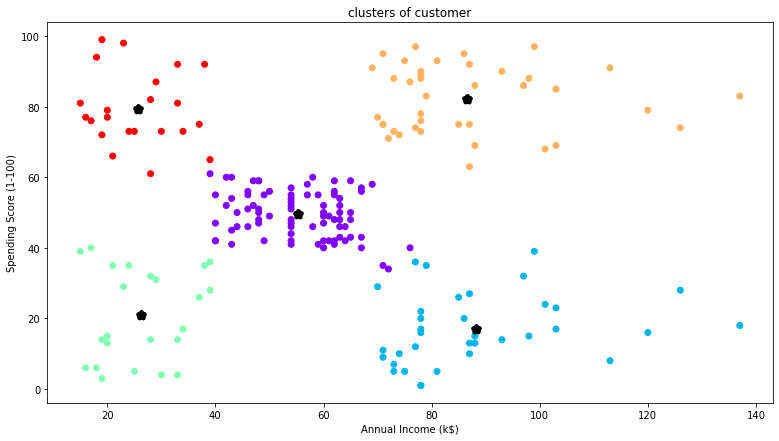

In [20]:
# plot
plt.figure(figsize= (13, 7))
plt.scatter(x2[:,0], x2[:,1], c= model.labels_, cmap= 'rainbow')
plt.scatter(x2_center[:,0], x2_center[:,1], color= 'black', marker= '*', linewidths=5)
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('clusters of customer');

Text(0.5, 1.0, 'elbow')

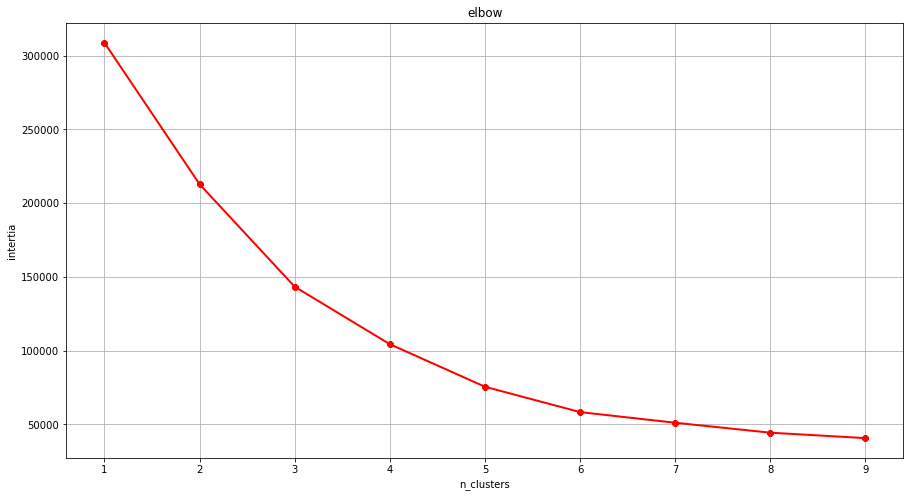

In [21]:
# ap dung elbow de tim n_cluster(6)
from sklearn.cluster import KMeans
x3 = data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].values
intertia = []
for i in range(1, 10):
    kmeans= KMeans(n_clusters= i, random_state= 2)
    kmeans.fit(x3)
    intertia.append(kmeans.inertia_)
plt.figure(figsize=(15, 8))
plt.grid()
plt.plot(range(1, 10), intertia, 
         marker= '8',
         linewidth = 2,
         color= 'red'
        )
plt.xlabel('n_clusters')
plt.ylabel('intertia')
plt.title('elbow')

In [22]:
# fit model
model = KMeans(n_clusters= 5, random_state= 2)
model.fit_predict(x3)
x3_center = model.cluster_centers_

Text(0.5, 0, 'Spending Score (1-100)')

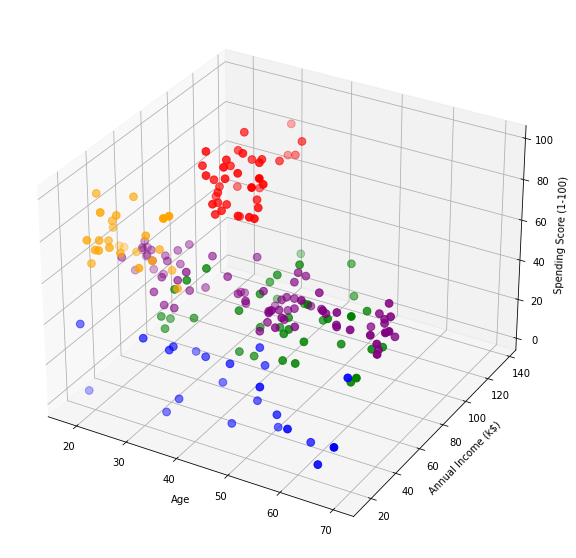

In [23]:
data['label'] = model.labels_
from mpl_toolkits.mplot3d import Axes3D
fig= plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection= '3d')
color = ['blue', 'red', 'green', 'orange', 'purple']
for i,colr  in zip(range(0, 5), color):
    ax.scatter(data['Age'][data['label']== i],data['Annual Income (k$)'][data['label']== i],data['Spending Score (1-100)'][data['label']== i],c= colr, s= 60  )
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
